In [1]:
import random
import sys
sys.path.append('../..')

from model import run
from model import plot_utils as pu
from model import processing
from model.amm.omnipool_amm import OmnipoolState
from model.amm.stableswap_amm import StableSwapPoolState
from model.amm.agents import Agent
from model.amm.trade_strategies import random_swaps, invest_all
from model.amm.global_state import GlobalState, swap, add_liquidity, migrate, migrate_lp, create_sub_pool
from model.amm import omnipool_amm as oamm

# same seed, same parameters = same simulation result
random.seed(42)

# set up the state

initial_state = GlobalState(
    pools = {
        "Omnipool": OmnipoolState(
            tokens={
                'HDX': {'liquidity': 1000000, 'LRNA_price': 4},
                'USD': {'liquidity': 1000000, 'LRNA_price': 100},
                'DAI': {'liquidity': 1000000, 'LRNA_price': 100},
                'R1': {'liquidity': 1000000, 'LRNA_price': 151},
                'R2': {'liquidity': 3000000, 'LRNA_price': 152},

            },
            lrna_fee=0,  # these can also be FeeMechanism type
            asset_fee=0
        )
    },
    agents = {
        'Trader1': Agent(
            holdings={'HDX': 10000, 'USD': 10000, 'R1': 10000, 'R2': 10000},
            trade_strategy = random_swaps(
                pool_id='Omnipool',
                amount={
                    'HDX': 25000, 'R1': 666, 'USD': 1000
                }
            )
        ),
        'Trader2': Agent(
            holdings={'HDX': 10000, 'USD': 10000, 'R1': 10000, 'R2': 10000},
            trade_strategy = random_swaps(
                pool_id='Omnipool',
                amount={
                    'R2': 667, 'R1': 666, 'USD': 1000
                }
            )
        )
    }
)

events = run.run(initial_state, 1000)

Starting simulation...
Execution time: 4.896 seconds.


<AxesSubplot:title={'center':'pool: Omnipool  liquidity R1 '}>

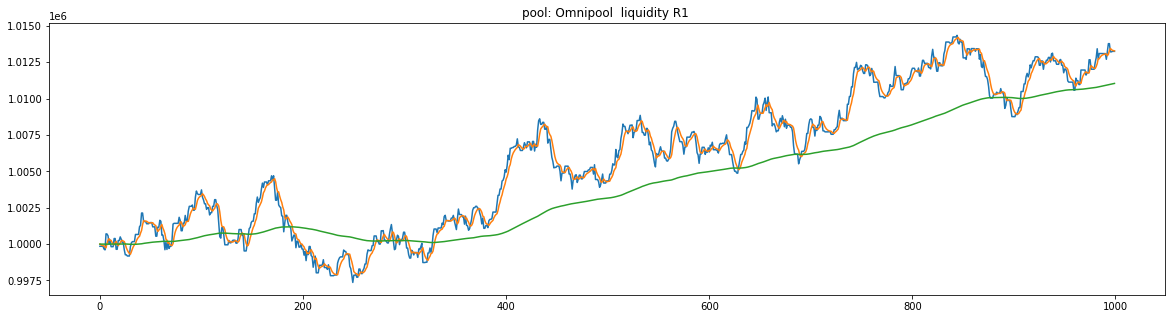

In [2]:
ax = pu.plot(events, pool='Omnipool', prop='liquidity', key='R1')
pu.plot(events, pool='Omnipool', oracle='short_oracle', prop='liquidity', key='R1', subplot=ax)
pu.plot(events, pool='Omnipool', oracle='long_oracle', prop='liquidity', key='R1', subplot=ax)

<AxesSubplot:title={'center':'pool: Omnipool long_oracle volume_in R1 '}>

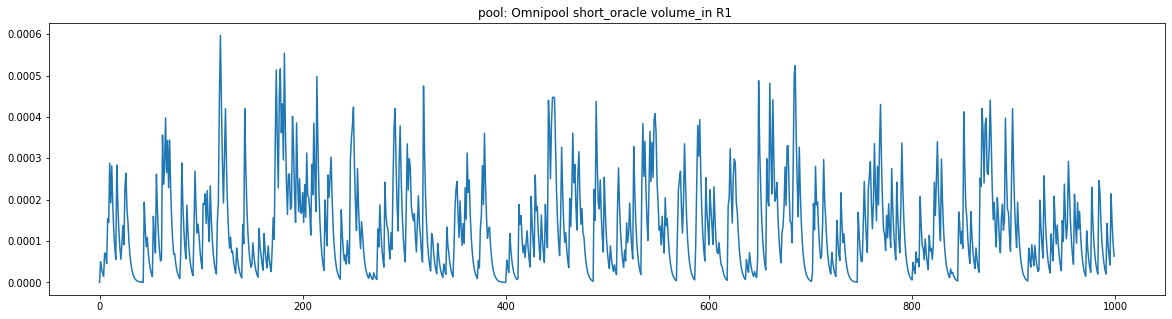

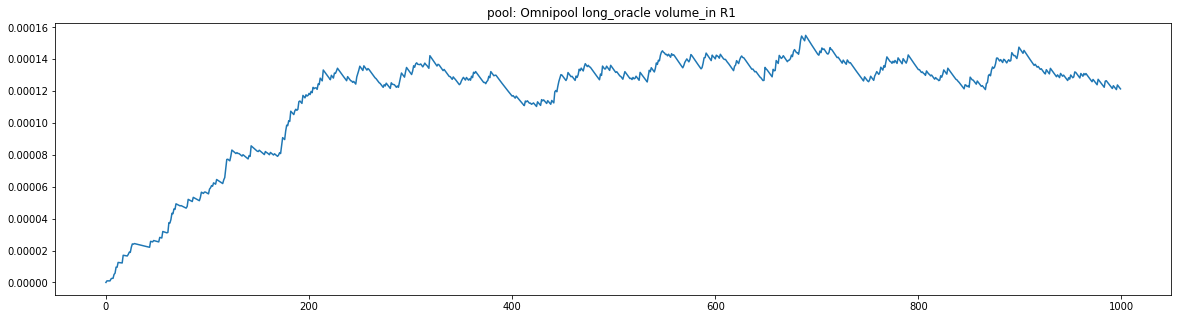

In [3]:

pu.plot(events, pool='Omnipool', oracle='short_oracle', prop='volume_in', key='R1')
pu.plot(events, pool='Omnipool', oracle='long_oracle', prop='volume_in', key='R1')
